In [1]:
#pip install opencv-python

In [2]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

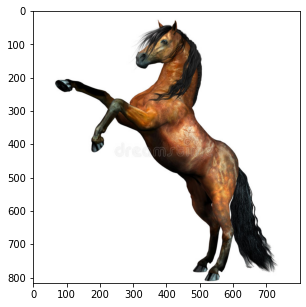

In [3]:
I = plt.imread('/content/drive/MyDrive/Colab Notebooks/Enhance IT/Skeletization/Caballo.jpg') #Caballo
#I = plt.imread('/content/drive/MyDrive/Colab Notebooks/Enhance IT/Skeletization/Elefante.jfif') #Elefante
plt.figure(figsize=(9,5))
plt.imshow(I)

In [4]:
#Load the image in grayscale
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Enhance IT/Skeletization/Caballo.jpg',0) #Caballo
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Enhance IT/Skeletization/Elefante.jfif',0) #Elefante
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
#Threshold the image with threshold value 127
ret,img = cv2.threshold(img,127,255,0)

In [6]:
ret

127.0

In [7]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [8]:
# Step 1: Create an empty skeleton
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

In [9]:
# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

In [10]:
# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img)==0:
        break

In [11]:
skel

array([[255,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255,   0,   0, ...,   0,   0, 255]], dtype=uint8)

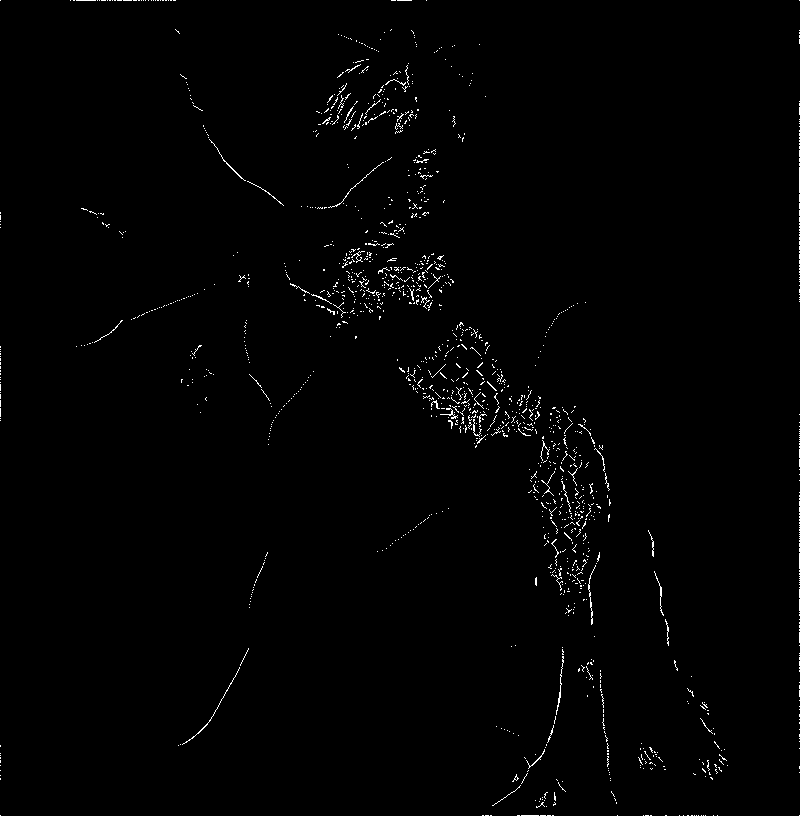

In [12]:
# Displaying the final skeleton
cv2_imshow(skel)
cv2.waitKey(0)
cv2.destroyAllWindows()